In [1]:
import numpy as np
import pandas as pd
from sklearn.datasets import make_classification

In [2]:
X,y = make_classification(n_features=5, n_redundant=0, n_informative=5,n_clusters_per_class=1)

In [3]:
df = pd.DataFrame(X,columns=['col1','col2','col3','col4','col5'])
df['target'] = y
print(df.shape)
df.head()

(100, 6)


,col1,col2,col3,col4,col5,target
0,-0.117407,0.678859,-0.649248,-1.100204,1.185535,0
1,0.053009,0.510561,-0.768836,-0.049358,1.086548,1
2,1.434269,1.170877,-2.965611,-2.891262,-0.665981,1
3,-1.181935,-0.063209,-0.962497,-2.843268,2.581937,0
4,0.843370,0.876171,1.500482,0.746032,1.704518,1


In [4]:
# function for row sampling

def sample_rows(df,percent):
  return df.sample(int(percent*df.shape[0]),replace=True)

In [8]:
# function for feature sampling
import random
def sample_features(df,percent):
  cols = random.sample(df.columns.tolist()[:-1],int(percent*(df.shape[1]-1)))
  new_df = df[cols]
  new_df['target'] = df['target']
  return new_df

In [9]:
# function for combined sampling

def combined_sampling(df,row_percent,col_percent):
  new_df = sample_rows(df,row_percent)
  return sample_features(new_df,col_percent)

In [10]:
df1 = combined_sampling(df,0.5,0.5)

C:\Users\DELL\AppData\Local\Temp\ipykernel_251352\516260379.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df['target'] = df['target']


In [11]:
df2 = combined_sampling(df,0.5,0.5)

C:\Users\DELL\AppData\Local\Temp\ipykernel_251352\516260379.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df['target'] = df['target']


In [12]:
df3 = combined_sampling(df,0.5,0.5)

C:\Users\DELL\AppData\Local\Temp\ipykernel_251352\516260379.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df['target'] = df['target']


In [13]:
print(df1.columns)
print(df2.columns)
print(df3.columns)

Index(['col2', 'col5', 'target'], dtype='object')
Index(['col1', 'col2', 'target'], dtype='object')
Index(['col5', 'col2', 'target'], dtype='object')


In [14]:
df3

,col5,col2,target
48,0.127255,0.398304,1
51,2.156471,1.058828,0
92,2.089317,1.065242,1
6,0.058226,-2.859825,0
27,1.271032,-2.090429,0
49,1.746978,0.688889,1
20,1.637626,0.997927,1
72,-0.480909,0.258472,1
10,-0.050002,-2.013247,0
47,2.161660,0.329095,1


In [15]:
from sklearn.tree import DecisionTreeClassifier
clf1 = DecisionTreeClassifier()
clf2 = DecisionTreeClassifier()
clf3 = DecisionTreeClassifier()

In [27]:
df1.iloc[:,0:5]

,col2,col5,target
47,0.329095,2.161660,1
24,-2.630746,0.202028,0
51,1.058828,2.156471,0
31,0.365498,2.780891,1
70,-0.122467,-0.154604,1
49,0.688889,1.746978,1
53,0.670397,1.725408,0
18,0.566883,-0.812381,1
83,0.480170,1.827553,1
7,1.507316,2.995288,1


In [28]:
clf1.fit(df1.iloc[:,0:2],df1.iloc[:,-1])
clf2.fit(df2.iloc[:,0:2],df2.iloc[:,-1])
clf3.fit(df3.iloc[:,0:2],df3.iloc[:,-1])

DecisionTreeClassifier()

In [17]:
from sklearn.tree import plot_tree

[Text(0.5, 0.75, 'x[2] <= 0.5\ngini = 0.499\nsamples = 50\nvalue = [24, 26]'),
 Text(0.25, 0.25, 'gini = 0.0\nsamples = 24\nvalue = [24, 0]'),
 Text(0.75, 0.25, 'gini = 0.0\nsamples = 26\nvalue = [0, 26]')]

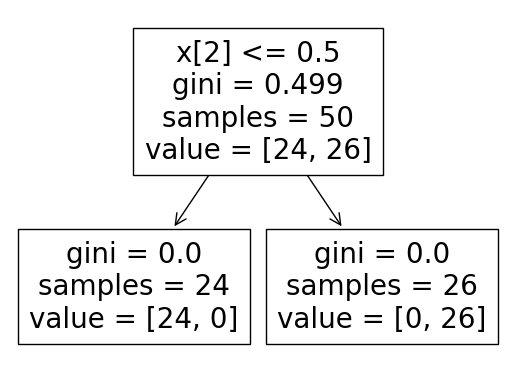

In [18]:
plot_tree(clf1)

[Text(0.5, 0.75, 'x[2] <= 0.5\ngini = 0.499\nsamples = 50\nvalue = [24, 26]'),
 Text(0.25, 0.25, 'gini = 0.0\nsamples = 24\nvalue = [24, 0]'),
 Text(0.75, 0.25, 'gini = 0.0\nsamples = 26\nvalue = [0, 26]')]

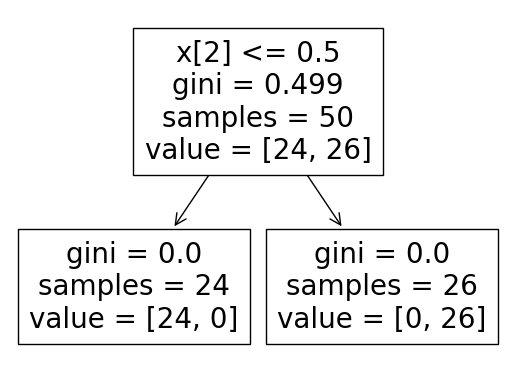

In [19]:
plot_tree(clf2)

[Text(0.5, 0.75, 'x[2] <= 0.5\ngini = 0.497\nsamples = 50\nvalue = [23, 27]'),
 Text(0.25, 0.25, 'gini = 0.0\nsamples = 23\nvalue = [23, 0]'),
 Text(0.75, 0.25, 'gini = 0.0\nsamples = 27\nvalue = [0, 27]')]

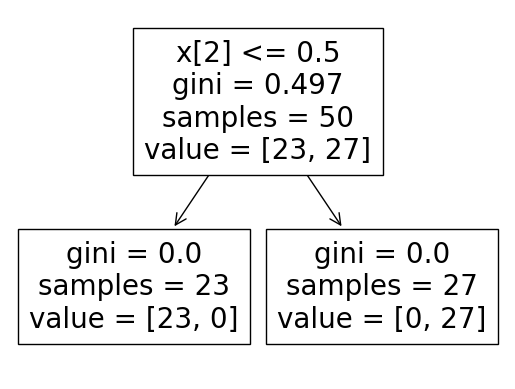

In [20]:
plot_tree(clf3)

In [30]:
clf1.predict(np.array([-1.042498,	-0.064323]).reshape(1,2))

C:\Users\DELL\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


array([0])

In [31]:
clf2.predict(np.array([-1.042498,	-0.064323]).reshape(1,2))

C:\Users\DELL\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


array([0])

In [32]:
clf3.predict(np.array([-1.042498,	-0.064323]).reshape(1,2))

C:\Users\DELL\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


array([0])